# Contours and topography Matplotlib

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load data
df = pd.read_csv('../data/data_3d_contour.csv')

In [5]:
Z = df.pivot_table(index='x', columns='y', values='z').T.values

X_unique = np.sort(df.x.unique())
Y_unique = np.sort(df.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

In [6]:
pd.DataFrame(Z).round(3)

,0,1,2,3,4,5,6
0,0.392,0.496,0.500,0.500,0.500,0.500,0.500
1,0.286,0.472,0.494,0.500,0.500,0.500,0.500
2,0.094,0.304,0.434,0.496,0.500,0.500,0.500
3,-0.036,0.118,0.308,0.460,0.500,0.500,0.500
4,-0.052,-0.042,0.120,0.328,0.480,0.500,0.500
5,-0.212,-0.192,-0.120,0.004,0.266,0.438,0.496
6,-0.320,-0.362,-0.348,-0.352,-0.304,-0.247,-0.145
7,-0.328,-0.414,-0.454,-0.460,-0.478,-0.474,-0.490


In [7]:
X_unique,Y_unique

(array([0.      , 0.19897 , 0.349485, 0.5     , 0.69897 , 0.849485,
        1.      ]),
 array([0.        , 0.26315789, 0.52631579, 0.63157895, 0.73684211,
        0.84210526, 0.94736842, 1.        ]))

In [8]:
pd.DataFrame(X).round(3)

,0,1,2,3,4,5,6
0,0.0,0.199,0.349,0.5,0.699,0.849,1.0
1,0.0,0.199,0.349,0.5,0.699,0.849,1.0
2,0.0,0.199,0.349,0.5,0.699,0.849,1.0
3,0.0,0.199,0.349,0.5,0.699,0.849,1.0
4,0.0,0.199,0.349,0.5,0.699,0.849,1.0
5,0.0,0.199,0.349,0.5,0.699,0.849,1.0
6,0.0,0.199,0.349,0.5,0.699,0.849,1.0
7,0.0,0.199,0.349,0.5,0.699,0.849,1.0


In [9]:
pd.DataFrame(Y).round(3)

,0,1,2,3,4,5,6
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.263,0.263,0.263,0.263,0.263,0.263,0.263
2,0.526,0.526,0.526,0.526,0.526,0.526,0.526
3,0.632,0.632,0.632,0.632,0.632,0.632,0.632
4,0.737,0.737,0.737,0.737,0.737,0.737,0.737
5,0.842,0.842,0.842,0.842,0.842,0.842,0.842
6,0.947,0.947,0.947,0.947,0.947,0.947,0.947
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000


/var/folders/sl/c5pyww8j61j6_9_z4twp2ygc0000gn/T/ipykernel_8558/1749564751.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


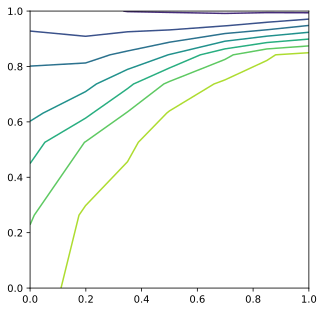

In [10]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.contour(X, Y, Z)

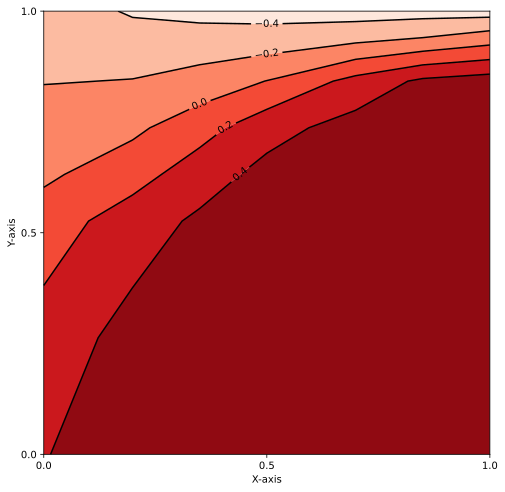

In [11]:
# Initialize plot objects
rcParams['figure.figsize'] = 8, 8 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([-0.4,-0.2,0,0.2,0.4])

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Z, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
ax.set_xlabel('X-axis')
_ = ax.set_ylabel('Y-axis')
#plt.savefig('figure.pdf') # uncomment to save vector/high-res version

/var/folders/sl/c5pyww8j61j6_9_z4twp2ygc0000gn/T/ipykernel_8558/2747445694.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)


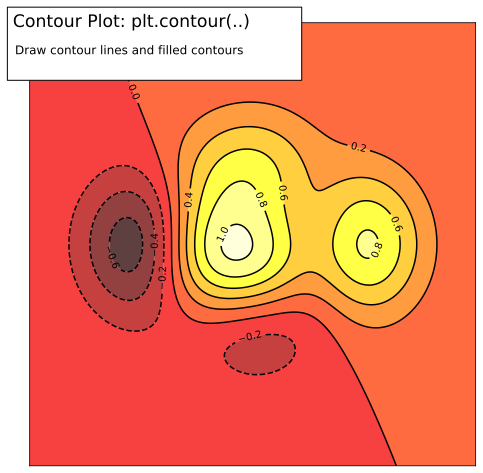

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)
plt.xticks([])
plt.yticks([])


# Add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
ax.add_patch(FancyBboxPatch((-0.05, .87),
                            width=.66, height=.165, clip_on=False,
                            boxstyle="square,pad=0", zorder=3,
                            facecolor='white', alpha=1.0,
                            transform=plt.gca().transAxes))

plt.text(-0.05, 1.02, " Contour Plot: plt.contour(..)\n",
      horizontalalignment='left',
      verticalalignment='top',
      size='xx-large',
      transform=plt.gca().transAxes)

plt.text(-0.05, 1.01, "\n\n  Draw contour lines and filled contours ",
      horizontalalignment='left',
      verticalalignment='top',
      size='large',
      transform=plt.gca().transAxes)

plt.show()

# Contours and topography Plotly

In [ ]:
import plotly.express as px
df = px.data.tips()

fig = px.density_contour(df, x="total_bill", y="tip")
fig.show()

In [15]:
fig = px.density_contour(df, x="total_bill", y="tip", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [16]:
fig = px.density_contour(df, x="total_bill", y="tip", facet_col="sex", color="smoker")
fig.show()

In [17]:
fig = px.density_contour(df, x="total_bill", y="tip")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [18]:
df = px.data.iris()
fig = px.density_contour(df, x="petal_length", y="petal_width", z="sepal_length", histfunc="avg")
fig.show()

In [19]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.uniform(-1, 1, size=500)
y = np.random.uniform(-1, 1, size=500)

fig = go.Figure(go.Histogram2dContour(
        x = x,
        y = y
))

fig.show()

In [20]:
import plotly.graph_objects as go

import numpy as np

x = np.random.uniform(-1, 1, size=500)
y = np.random.uniform(-1, 1, size=500)

fig = go.Figure(go.Histogram2dContour(
        x = x,
        y = y,
        colorscale = 'Blues'
))

fig.show()

In [21]:
import plotly.graph_objects as go

import numpy as np

t = np.linspace(-1, 1.2, 2000)
x = (t**3) + (0.3 * np.random.randn(2000))
y = (t**6) + (0.3 * np.random.randn(2000))

fig = go.Figure()
fig.add_trace(go.Histogram2dContour(
        x = x,
        y = y,
        colorscale = 'Blues',
        reversescale = True,
        xaxis = 'x',
        yaxis = 'y'
    ))
fig.add_trace(go.Scatter(
        x = x,
        y = y,
        xaxis = 'x',
        yaxis = 'y',
        mode = 'markers',
        marker = dict(
            color = 'rgba(0,0,0,0.3)',
            size = 3
        )
    ))
fig.add_trace(go.Histogram(
        y = y,
        xaxis = 'x2',
        marker = dict(
            color = 'rgba(0,0,0,1)'
        )
    ))
fig.add_trace(go.Histogram(
        x = x,
        yaxis = 'y2',
        marker = dict(
            color = 'rgba(0,0,0,1)'
        )
    ))

fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    yaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    xaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    height = 600,
    width = 600,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)

fig.show()